# **LATAR BELAKANG**

Airbnb adalah sebuah platform online yang menghubungkan pemilik properti yang ingin menyewakan ruang mereka dengan para wisatawan atau pengunjung. Sebagai platform online untuk penyewaan akomodasi, Airbnb telah mengubah cara orang mencari dan menyewa tempat tinggal selama perjalanan mereka. Dalam penggunaannya, Airbnb menyediakan layanan yang memungkinkan pemilik properti untuk memasarkan dan menyewakan ruang mereka kepada para tamu yang mencari akomodasi. Data yang diberikan mencakup informasi tentang listing yang tersedia di Bangkok, Thailand. Setiap baris dalam tabel mewakili satu listing dan kolom menyimpan informasi terkait seperti nama, host, lokasi geografis, jenis kamar, harga, jumlah ulasan, dan lainnya.

# **PROBLEM**

Masalah yang dihadapi oleh perusahaan adalah ketidaksesuaian antara persebaran kamar yang dimiliki dengan karakteristik wilayah di Bangkok. Kurang tepatnya variasi jenis kamar yang sesuai dengan kebutuhan dan preferensi konsumen di setiap wilayah dapat menghambat perusahaan dalam memenuhi permintaan pelanggan dengan baik. Hal ini dapat mengakibatkan penurunan daya tarik perusahaan di pasar dan berpotensi kehilangan peluang untuk meningkatkan penjualan.

# **TUJUAN ANALISIS**

Analisis dilakukan untuk mengevaluasi masalah ketidaksesuaian antara persebaran kamar yang dimiliki oleh perusahaan dengan karakteristik wilayah di Bangkok. Tujuan dari analisis ini adalah untuk memahami karakteristik dan preferensi konsumen di setiap wilayah, serta mengevaluasi kecocokan antara jenis kamar yang tersedia di setiap wilayah. Dengan memahami karakteristik dan geografis wilayah, perusahaan dapat mengidentifikasi area di mana mereka perlu meningkatkan penawaran kamar yang sesuai. Analisa ini dapat dijadikan acuan untuk **ekspansi dan meningkatkan sales penjualan di tahun berikutnya**. Informasi ini akan membantu pihak dari Sales & Marketing AirBnb untuk dapat menenentukan lokasi yang tepat serta meningkatkan kualitas dari listing di setiap wilayah. Maka hal yang harus dijadikan analisa adalah:

1. Di wilayah mana terdapat jumlah listing terbanyak? Apa karakteristik khusus dari wilayah tersebut yang membuatnya diminati oleh pengguna? Hal ini dapat membantu Airbnb dalam mengarahkan upaya pemasaran dan pengembangan di wilayah yang paling diminati oleh pengguna.

2. Apa distribusi jenis kamar yang tersedia dalam data listing? Bagaimana proporsi masing-masing jenis kamar, seperti "Entire home/apt", "Private room", dan "Shared room"? Hal ini penting untuk memahami preferensi pengguna dan mengoptimalkan portofolio kamar yang ditawarkan.

3. Bagaimana hubungan antara harga dan tingkat penjualan untuk setiap jenis kamar atau wilayah?


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, f_oneway


import warnings
warnings.filterwarnings("ignore")

* id: Identifikasi unik Airbnb untuk listing.
* name: Nama untuk listing yang ada di dalam Airbnb
* host_id: Identifikasi unik Airbnb untuk host/owner
* host_name: Nama pemilik listing
* neighborhood: Lingkungan atau region tempat listing berada.
* latitude: Koordinat lintang lokasi menggunakan proyeksi World Geodetic System (WGS84).
* longitude: Koordinat bujur lokasi menggunakan proyeksi World Geodetic System (WGS84).
* room_type: Tipe kamar yang tersedia untuk listing.
* price: Harga listing yang telah terdaftar
* minimum_nights: Jumlah minimum malam yang diperlukan untuk memesan listing.
* number_of_reviews: Jumlah total ulasan yang diterima oleh listing.
* last_review: Tanggal ulasan terakhir untuk listing.
* reviews_per_month: Jumlah rata-rata ulasan yang diterima oleh listing per bulan. dari mulai listing tersebut di daftarkan sampai tanggal terakhir ulasan tersebut diberikan oleh pengguna
* calculated_host_listings_count: Jumlah semua listing yang dimiliki oleh owner.
* availability_365: Ketersediaan listing dalam 365 hari ke depan.
* number_of_reviews_ltm: Jumlah ulasan yang diterima oleh listing dalam 12 bulan terakhir.

In [69]:
df = pd.read_csv('Airbnb Listings Bangkok.csv')

In [70]:
df

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


Karena kolom Unnamed: 0 adalah hasil duplikat dari index kita tidak memerlukan kolom tersebut. Maka penanganannya adalah dengan kita menghilangkan kolom tersebut

In [71]:
df.drop(columns=['Unnamed: 0'], inplace=True)

# **DATA UNDERSTANDING AND CLEANING**

Dalam tahapan ini kita harus mengetahui dan memahami domain knowledge yang ada di dalam data kita. Pemahaman data melibatkan memahami variabel, tipe data, statistik ringkasan, dan penanganan missing values dalam dataset. Ini penting untuk memahami konteks data, karakteristik dasar, dan mempersiapkan data untuk analisis lebih lanjut.

Pertama kita dapat melihat informasi secara umum dalam dataset ini

In [72]:
df.info()
display(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15854 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               

(15854, 16)

In [73]:
df.isna().sum()

id                                0   
name                              8   
host_id                           0   
host_name                         0   
neighbourhood                     0   
latitude                          0   
longitude                         0   
room_type                         0   
price                             0   
minimum_nights                    0   
number_of_reviews                 0   
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count    0   
availability_365                  0   
number_of_reviews_ltm             0   
dtype: int64

In [74]:
display(df.describe(), df.describe(include='object'))

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15854,15854,15854,10064
unique,14794,5313,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [75]:
df[df['availability_365']==0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
51,1019241,Chic two bedroom for Monthly rental,3323622,Phoebe,Bang Rak,13.726870,100.527250,Entire home/apt,2701,30,104,2020-02-20,0.89,1,0,0
61,1041976,Long-stay special rate spacious entire floor Siam,5735895,Pariya,Parthum Wan,13.748140,100.520160,Entire home/apt,2900,1125,295,2021-08-21,2.61,3,0,0
104,527553,"Beautiful Apt @ Ratchayothin BTS, Free Wifi",2592798,Nokina,Chatu Chak,13.828410,100.571030,Entire home/apt,1004,2,24,2018-07-22,0.19,2,0,0
141,1244333,"Private Room@Chatuchak,BTS,JJ market,DMK airport",2087671,Apipu,Phaya Thai,13.792210,100.546310,Private room,399,1,33,2020-03-15,0.78,1,0,0
152,1316688,Contemporary Modern Duplex - Thonglor,5394070,Eva,Khlong Toei,13.722420,100.579620,Entire home/apt,1489,30,81,2022-10-07,0.72,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15431,779396995711655318,The Inspired Luxury: 1BR/MRT/Pool/JODD Fair,133082557,Jean,Huai Khwang,13.753800,100.574680,Entire home/apt,1400,2,0,NaN,NaN,19,0,0
15433,779434871544801466,The Grand Luxury Suite:2BR 2WC /High Floor/Netflix,133082557,Jean,Huai Khwang,13.759550,100.569950,Entire home/apt,3000,1,0,NaN,NaN,19,0,0
15438,779503507904940932,Cosy Room near MBK Siam Paragon,214984794,Sita,Parthum Wan,13.741934,100.524283,Private room,1879,1,0,NaN,NaN,10,0,0
15498,780301430602562032,Chill Out With Love :1BR WIFI/JOOD Fair/Pool,132745392,Mt,Huai Khwang,13.753780,100.574480,Entire home/apt,1000,2,0,NaN,NaN,25,0,0


In [76]:
pd.set_option('display.max_colwidth', -1)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
1,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel room, Best nr Chatujak, MRT, BTS free wifi&fNetflix, ❂Citycenter✔Subway station✔Private Bathroom4Aircon, Nice River View Condominium 30 sq.m, Monthly rent 2Beds/2Baths quiet APT at BTS, Sukhumvit apartment near Nana BTS, A room w/ the view :-) in the city, Spacious 1Bed apartment, Near Bangkok more space than urban!, ✺✺99 feet in the sky✺✺, Cozy Studio Apt near Skytrain.(72/74), Asoke: tasteful, modern 1BR condo, 2 b

Analisa kolom `number_of_review` , `last_review` dan `number_of_reviews_ltm`

In [77]:
df['number_of_reviews_ltm'].unique()

array([  0,   1,   3,  13,   2,   7,   5,  10,   9,  12,  29,   4,  19,
        56,  20,  11,   6,  14,   8,  43,  18,  30,  15, 277,  26,  59,
        21,  41,  16,  22,  25,  38,  42,  40,  31,  39,  35,  44,  17,
        27,  36,  23,  79,  50,  24,  34,  47,  37,  32,  73,  48,  28,
        45,  67,  46, 147, 109,  68,  62,  51,  72,  52,  49,  33,  69,
       325,  55, 146,  61, 124,  75,  71, 138,  57,  70,  90,  65, 141,
       246, 118,  80,  53,  63,  60, 101], dtype=int64)

In [78]:
df[df['last_review'].str.contains('2017', na=False)]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.69757,100.52880,Entire home/apt,1000,250,19,2017-08-03,0.17,41,365,0
97,432004,STUDIO-WIFI-RAIN SHOWER-SATHORN,2148220,Marvin,Sathon,13.71922,100.52550,Private room,1736,1,14,2017-02-23,0.12,3,356,0
154,1323380,Master Suite in Pool Villa,2975807,Ingo,Vadhana,13.74618,100.55168,Private room,9600,28,1,2017-06-19,0.01,2,365,0
158,2118606,City heart resort style condo.,10802851,Susie,Phaya Thai,13.78064,100.54393,Entire home/apt,1385,3,7,2017-07-26,0.07,1,348,0
159,2124717,Large cozy Studio in on nut 17,5469970,Yair,Suanluang,13.72340,100.61828,Entire home/apt,1212,10,10,2017-08-10,0.10,10,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,22110378,"Superb one bed room in CBD, Brand new furniture",161183511,Juliette,Khlong Toei,13.71015,100.59278,Private room,5000,3,2,2017-12-25,0.03,1,365,0
4232,21669676,ที่พักสะอาด ใกล้แหล่งบันเทิง ห้องนอนวิวสระว่ายน้ำ,157737165,สุวิทย์,Pra Wet,13.69773,100.65164,Private room,990,1,1,2017-11-13,0.02,1,365,0
4249,22155424,Fully Cozy Room,161504514,Sorawit,Lat Krabang,13.72088,100.72019,Private room,1500,3,1,2017-12-19,0.02,1,90,0
4250,22156499,Cozy room near BTS,50194444,Rosa,Bang Na,13.65703,100.60898,Private room,699,1,1,2017-12-21,0.02,1,90,0


In [79]:
df[df['last_review'].str.contains('2019', na=False)]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
9,952677,Standard Room Decor do Hostel,5171292,Somsak,Khlong San,13.72040,100.50757,Private room,700,2,4,2019-12-27,0.03,10,87,0
10,55681,Sathorn Terrace Apartment(61),263049,Tor,Bang Rak,13.71934,100.51760,Private room,1150,2,27,2019-01-03,0.19,7,320,0
12,55686,Comfy bedroom near River pier & BTS Taksin.,263049,Tor,Sathon,13.71802,100.51539,Hotel room,1862,2,208,2019-12-02,1.44,7,361,0
16,1791481,Nice and Quiet condo near BTS Onnut,9399478,Piyakorn,Khlong Toei,13.70719,100.59936,Entire home/apt,1577,30,78,2019-05-31,0.78,1,330,0
29,973830,BangLuang House1 @ Bangkok Thailand,5325919,วสวัตติ์,Bangkok Yai,13.73292,100.46413,Private room,2078,1,76,2019-12-31,0.64,3,350,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,40446442,Thonglor/ Best location/ 55sqm,283565412,Pakjira,Khlong Toei,13.72770,100.57138,Entire home/apt,3260,1,1,2019-12-06,0.03,1,90,0
9679,40453298,Private room for Female - Rabbit Hole,108945430,Rabbitat Hostel,Ratchathewi,13.75391,100.53423,Private room,800,1,1,2019-12-29,0.03,5,365,0
9696,40461871,❤️twin bed in the middle of bkk city❤️,313054110,Jidapa,Phra Khanong,13.70314,100.60283,Entire home/apt,1700,1,1,2019-12-12,0.03,1,178,0
9790,41040841,Nice 35sqm Condominium in CBD Ploenchit Station,54498420,Henry,Parthum Wan,13.73874,100.54867,Entire home/apt,1200,60,1,2019-12-27,0.03,1,362,0


In [80]:
df[df['last_review'].str.contains('2022', na=False)]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
11,1765918,2BR apt in a cozy neighborhood,9279712,Jing,Phaya Thai,13.774860,100.542720,Entire home/apt,1893,15,129,2022-09-30,1.17,1,356,1
19,1793000,The Duplex - Asoke- Luxury 92sqm,9407280,Timo,Vadhana,13.746680,100.561370,Entire home/apt,5034,21,287,2022-11-22,2.59,1,349,3
28,145343,Boutique Rooms Near Bangkok Airport,703944,Parinya,Lat Krabang,13.721868,100.771713,Private room,1329,1,28,2022-11-25,0.28,1,349,13
30,156583,Studio near Chula University/Silom walk to MRT/BTS,58920,Gael,Bang Rak,13.728500,100.523130,Entire home/apt,1176,7,63,2022-11-25,0.47,2,95,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15712,785741287659406453,ใจกลางเมืองติดห้างไอคอนสยาม,200814460,Noi,Thon buri,13.696506,100.486226,Entire home/apt,2000,1,1,2022-12-25,1.00,2,361,1
15728,785976692600131294,1br/Free pool&gym/WIFI-Asok/SukhumvitBTS! 2PP,485536928,Lucas,Khlong Toei,13.734856,100.557960,Entire home/apt,2514,1,1,2022-12-26,1.00,4,257,1
15743,786248090308669514,Vibrant Luxe 2 Bedroom | Thong Lor,46163812,Ernest,Vadhana,13.730126,100.586369,Entire home/apt,3932,1,3,2022-12-24,3.00,8,349,3
15744,786318268883527580,Vibrant Luxe 2 Bedroom | Thong Lor,46163812,Ernest,Vadhana,13.729880,100.586269,Entire home/apt,4285,28,3,2022-12-28,3.00,8,365,3


In [81]:
df[df['reviews_per_month']==0.5]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.5,2,353,0
853,5885757,"New Condo , Ideo Mobi, Bangkok",28135799,Kriengwut,Phra Khanong,13.705260,100.603180,Entire home/apt,2000,2,46,2020-01-27,0.5,1,271,0
1365,9678113,♥Big room near BTS 5 min♥free Hi speed wifi♥,49626061,Chayut,Thon buri,13.715240,100.480310,Entire home/apt,2000,60,26,2019-09-18,0.5,1,89,0
1556,9935839,Silom 3 apartment no. 1 (BTS Saladaeng station),26736483,K,Bang Rak,13.725770,100.532250,Entire home/apt,954,1,41,2022-12-23,0.5,89,0,12
1956,13007341,New Near MRT 1BR Kitchen Pool Fitness Quiet&Safe,71749140,Anucha,Huai Khwang,13.772075,100.577812,Entire home/apt,935,30,40,2017-02-07,0.5,1,365,0
2228,14408446,Private & Cozy Room Next to Taopoon MRT,88606186,Chatchawal,Bang Sue,13.805940,100.531080,Private room,1090,2,38,2022-06-12,0.5,1,280,2
2425,15641357,Private&Cozy apartment#3 Silom 3 BTS Saladaeng,26736483,K,Bang Rak,13.726350,100.531670,Entire home/apt,1089,1,37,2022-12-02,0.5,89,350,14
2450,15312261,Baan Kachitpan - Cozy Room,89606391,BaanKachitpan,Phra Nakhon,13.756930,100.497440,Private room,1226,1,34,2020-01-31,0.5,5,301,0
2767,16422207,"Friendly home on Sukhumvit Rd., closed to skytrain",28872711,Kwang,Bang Na,13.680000,100.610310,Private room,970,2,36,2018-07-05,0.5,3,179,0
3907,21045093,Boutique Suite With Living Area in LUXX XL Langsuan Hotel,68154488,Dusadee,Parthum Wan,13.735710,100.541980,Private room,5008,1,23,2022-12-19,0.5,62,351,11


In [82]:
df['reviews_per_month'].max()

19.13

In [83]:
df[df['name']=='Boutique Rooms Near Bangkok Airport']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
28,145343,Boutique Rooms Near Bangkok Airport,703944,Parinya,Lat Krabang,13.721868,100.771713,Private room,1329,1,28,2022-11-25,0.28,1,349,13


In [84]:
df[df['last_review'].str.contains('2023', na=False)]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


Dari hasil analisa diatas domain knowledge yang dapat diperoleh adalah:

* Istilah "listing" mengacu pada setiap properti atau akomodasi yang tersedia untuk disewakan oleh tuan rumah (host). Setiap listing mewakili unit yang unik, seperti apartemen, rumah, kamar pribadi, kamar hotel, atau tempat tidur bersama, yang dapat disewa oleh pengguna Airbnb.

* Dataset Airbnb Listings Bangkok mempunyai `15854 baris dan 16 kolom`

* Dataset diatas mempunyai data kosong antara lain pada kolom `name` , `last_review` , `reviews_per_month`. Data Kosong dalam data tersebut diwakili dengan kata NaN
* Kolom `last_review` dan `review_per_month` memiliki missing value yang sama. Dimana kolom `last_review` mewakili sebagai tanggal terakhir customer memberikan review di listing tersebut dan kolom `review_per_month` adalah rata - rata jumlah review yang diperoleh dalam waktu sebulan. Jadi jika keduanya kosong adalah tidak ada pengguna yang memberikan review terhadap listing tersebut. Jadi jika tidak ada pengguna yang memberikan review terhadap listing maka tidak ada tanggal terakhir yang diberikan.
* Dari hasil analisa diatas kolom `number_of_reviews_ltm` mengacu kepada tahun **2022**. Dimana kolom `number_of_reviews_ltm` akan bernilai 0 jika kolom `last_review` dibawah tahun 2022. Dan akan memiliki nilai jika review ada di tahun 2022. Nilai kolom `number_of_reviews_ltm` hanya terhitung jika review diberikkan di tahun 2022. Jadi secara kesimpulan kolom `number_of_reviews` adalah total keseluruhan review dari mulai listing tersebut di daftarkan. Sedangkan `number_of_reviews_ltm` adalah total review hanya per tahun 2022

* Tipe Data dari kolom `last_review` sebetulnya bisa diganti formatnya menjadi date tetapi karena kita ingin mengisi menjadi Not Reviewed. String tidak bisa di input ketika tipe data tersebut date. Dan dapat juga diganti menjadi datetime tetapi kolom yang dihasilkan ada format time nya dan hasil timenya semua adalah 00.00.00 dimana kita tidak butuh variable tersebut

* Kolom `availability_365` mewakilkan jumlah ketersediaan listing yang tersedia dalam waktu setahun. Ada sekitar **857 baris** yang memiliki jumlah 0. Artinya di dalam data ini terdapat listing yang tidak dapat disewakan. Asumsinya bisa jadi host dari pihak properti memang sudah tidak menyewakan unit nya di Airbnb tetapi data nya masih ada.

# **HANDLING MISSING VALUE AND ANOMALIES**

In [85]:
df.isna().sum()

id                                0   
name                              8   
host_id                           0   
host_name                         0   
neighbourhood                     0   
latitude                          0   
longitude                         0   
room_type                         0   
price                             0   
minimum_nights                    0   
number_of_reviews                 0   
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count    0   
availability_365                  0   
number_of_reviews_ltm             0   
dtype: int64

In [86]:
missing_name = df['name'].isnull().sum()
missing_last_review = df['last_review'].isnull().sum()
missing_reviews_per_month = df['reviews_per_month'].isnull().sum()

percent_missing_name = (missing_name / len(df)) * 100
percent_missing_last_review = (missing_last_review / len(df)) * 100
percent_missing_reviews_per_month = (missing_reviews_per_month / len(df)) * 100

print("Persentase missing value pada kolom 'name': {:.2f}%".format(percent_missing_name))
print("Persentase missing value pada kolom 'last_review': {:.2f}%".format(percent_missing_last_review))
print("Persentase missing value pada kolom 'reviews_per_month': {:.2f}%".format(percent_missing_reviews_per_month))

Persentase missing value pada kolom 'name': 0.05%
Persentase missing value pada kolom 'last_review': 36.52%
Persentase missing value pada kolom 'reviews_per_month': 36.52%


Secara garis besar:  
* missing value di kolom `name` ada di angka 0.05% dari jumlah keseluruhan data
* missing value di kolom `last_review` dan `reviews_per_month` masing mempunyai angka yang sama sebanyak 36.52% dari jumlah keseluruhan data

Cara untuk menangani missing value:
* pertama untuk kolom `name` karena nilai nya kecil kita bisa drop yang mempunyai missing value. Tetapi kita harus cek missing valuenya telebih dahulu
* kedua untuk kolom `last_review` dan `reviews_per_month` karena nilainya cukup besar. kita bisa mengisi missing value tersebut. berdasarkan domain knowledge yang telah di dapatkan kita bisa mengisi missing value dari kolom `last review` dengan **Not Reviewed** dan kolom `reviews_per_month` dengan nilai 0

In [87]:
df[df['name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


Ada satu host name yang memiliki jumlah listing sebanyak 3 tetapi satu tidak ada namanya. Mari kita analisa lebih lanjut

In [88]:
df[df['host_name']=='Pakaphol']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaN,NaN,3,1,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [89]:
df.at[2075, 'name'] = "Errday Guest House"

In [90]:
df[df['host_name']=='Pakaphol']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaN,NaN,3,1,0
2075,13142743,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


Dari hasil diatas kita dapat melakukan manipulasi data dengan mengisi kolom nama berdasarkan listing yang sama

Sekarang kita lihat missing value di kolom name yang lain

In [91]:
df[df['name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0


Dari hasil analisa diatas terlihat bahwa nama listing tidak ada tetapi kolom lain terisi bahkan sudah ada yang memberikan review. Tetapi ada banyak juga yang memang tidak ada reviewnya. Ini dapat dikatakan anomali karena nama dari listing adalah hal yang penting sebagai identitas dari sebuah listing. dan listing dapat dikatakan terpercaya jika ada nama dari listing. Asumsi nya adalah ini listing yang tidak terpercaya dan dapat menjadi resiko terjadinya fraud. Maka tindakan yang harus diambil adalah menghilangkan listing tersebut dari data

In [92]:
df.dropna(subset=['name'], inplace=True)

Mengapa hal ini bisa terjadi? Dapat diasumsikan ketika host mengisi pendaftaran untuk pembuatan listing pada Airbnb, mungkin terjadi bug atau memang listing dapat dibuat tanpa mencantumkan nama listing. Dimana hal itu bisa menyebabkan terjadinya fraud

Rekomendasi : Sebaiknya pihak dari AirBnb memperhatikan dan memperbaiki sistem ketika host mendaftarkan sebuah listing. Jadi listing tidak bisa dibuat ketika host tidak mencatumkan nama pada listing yang ingin dibuat.

In [93]:
df.loc[[5577]]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5577,28234237,อพาร์ทเมนท์ Antioch,213263577,William,Bang Khun thain,13.64187,100.43535,Shared room,13852,1,0,NaN,NaN,1,90,0


Terdapat anomali dalam kategori room type berjenis Shared room. Dimana harga yang dimasukkan sangat tinggi untuk wilayah yang letaknya jauh dari pusat kota dan untuk kategori Shared room yang seharusnya harganya cenderung murah. Maka kita bisa drop row ini

In [94]:
df.drop(5577, inplace=True)

In [95]:
df.isna().sum()

id                                0   
name                              0   
host_id                           0   
host_name                         0   
neighbourhood                     0   
latitude                          0   
longitude                         0   
room_type                         0   
price                             0   
minimum_nights                    0   
number_of_reviews                 0   
last_review                       5783
reviews_per_month                 5783
calculated_host_listings_count    0   
availability_365                  0   
number_of_reviews_ltm             0   
dtype: int64

In [96]:
df[df['last_review'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


In [97]:
df['last_review'] = df['last_review'].fillna('Not Reviewed')
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

Kita dapat mengisi kolom `last_review` dengan nilai "Not Reviewed" dan kolom `reviews_per_month` dengan nilai 0 untuk mengisi missing value.

In [98]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [99]:
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,Not Reviewed,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,Not Reviewed,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,Not Reviewed,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,Not Reviewed,0.00,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,Not Reviewed,0.00,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,Not Reviewed,0.00,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,Not Reviewed,0.00,14,365,0


In [100]:
df['room_type'].value_counts()

Entire home/apt    8911
Private room       5764
Hotel room         649 
Shared room        522 
Name: room_type, dtype: int64

In [101]:
df_apart=df[df['room_type']=='Entire home/apt'].sort_values('price',ascending=False)
df_prvt=df[df['room_type']=='Private room'].sort_values('price',ascending=False)
df_hotel=df[df['room_type']=='Hotel room'].sort_values('price',ascending=False)

display(df_apart.head(10))
display(df_prvt.head())

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
12868,635676064543597376,New 1 bedroom apartment BTS MRT Asoke,12464705,Lucio,Vadhana,13.742186,100.560394,Entire home/apt,1100000,14,0,Not Reviewed,0.00,1,365,0
12300,562972065309061724,3B中文No Guest Service Fee@Nana Asok/Soi11 Nightlife,131427125,Jj,Vadhana,13.746660,100.559100,Entire home/apt,1014758,30,2,2022-09-17,0.32,10,75,2
6289,29909847,BTS轻轨线on nut站，全新一房一厅，临Tesco商场市集!New cozy 1BR,210559448,Cora,Khlong Toei,13.703330,100.592470,Entire home/apt,1000000,2,69,2020-03-12,1.39,6,90,0
1779,11579635,"2 Bedroom,wifi,5mMRT&Shopping Mall",30803267,Yasmine,Huai Khwang,13.754710,100.565980,Entire home/apt,1000000,100,53,2018-02-20,0.64,4,249,0
4620,23740993,"Modern&Luxury apartment,5min to MRT,freeWifi",30803267,Yasmine,Huai Khwang,13.760650,100.568980,Entire home/apt,1000000,1,12,2020-03-24,0.22,4,336,0
9345,39858231,1BR cozy condo close to ONNUT BTS.,210559448,Cora,Khlong Toei,13.704960,100.591510,Entire home/apt,1000000,25,2,2020-02-23,0.05,6,88,0
1239,8880974,"Modern,wifi,5m MRT&2 Shopping Mall",30803267,Yasmine,Huai Khwang,13.759950,100.569360,Entire home/apt,1000000,100,45,2016-09-05,0.51,4,180,0
15200,766201549677186657,80米轻轨站，空中泳池+健身房，I con siam沙吞河景圈，距离大皇宫4公里，乳胶床垫,28589379,Lily,Khlong San,13.721270,100.495270,Entire home/apt,710760,12,0,Not Reviewed,0.00,1,313,0
1850,12056763,Charoenkrung Road House/Office Rent,62898498,Charlie,Bang Rak,13.727880,100.518720,Entire home/apt,300000,365,0,Not Reviewed,0.00,1,365,0
12634,597430700332581904,Four seasons private residences with river view,394945171,Lulu,Sathon,13.713400,100.511040,Entire home/apt,200000,1,0,Not Reviewed,0.00,2,361,0


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
4373,22633450,rm 1 : cozy & comfy,117057915,Jeab,Bang Phlat,13.79163,100.49038,Private room,600700,1,9,2020-01-26,0.17,5,330,0
11885,52940323,🎗𝘾𝙝𝙚𝙬𝙖𝙩𝙝𝙖𝙞 𝙍𝙖𝙢𝙠𝙝𝙖𝙢𝙝𝙖𝙚𝙣𝙜\nBy KhunGrape,99882630,Jiranuch,Bang Kapi,13.76082,100.63366,Private room,429443,1,0,Not Reviewed,0.00,1,313,0
12792,629653142142561774,rm 6 : bright morning sunlight.,117057915,Jeab,Bang Phlat,13.79049,100.48816,Private room,400717,1,0,Not Reviewed,0.00,5,241,0
6549,31365769,"WH (container, Double bed, 2ppl -F)",234881965,Napawadee,Khlong Toei,13.73514,100.55217,Private room,372227,1,24,2020-01-27,0.50,4,147,0
6760,31364368,"WH (Container style, twin bed, 2ppl, citycenter-A)",234881965,Napawadee,Khlong Toei,13.73505,100.55239,Private room,314899,1,4,2020-02-24,0.10,4,147,0


Data sudah tidak ada missing value

Selanjutnya kita akan melakukan cek terhadap data duplicate

# **HANDLING DUPLICATE DATA**

In [102]:
duplicate_rows = df[df.duplicated(subset=['name','longitude', 'latitude', 'price', 'last_review'])]
duplicate_rows

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5976,28907857,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.762790,100.497900,Private room,1400,1,0,Not Reviewed,0.0,9,361,0
8790,37954129,small1,97598307,Soo,Don Mueang,13.920720,100.575780,Shared room,350,1,0,Not Reviewed,0.0,4,180,0
15121,767128654727724698,Sathon Luxury Loft/China Town/Icon Siam,276781306,Alex,Sathon,13.710777,100.519891,Entire home/apt,1580,1,0,Not Reviewed,0.0,13,339,0
15144,767945912006659422,Sathon Luxury Loft/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,1580,1,0,Not Reviewed,0.0,40,339,0
15186,765691389894680033,Sathon Luxury 2 br/China Town/Icon Siam,264864968,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,Not Reviewed,0.0,44,340,0
15190,765716244664642439,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,Not Reviewed,0.0,40,340,0
15191,765721954905526928,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,Not Reviewed,0.0,40,340,0
15192,765728211212001811,Sathon Luxury 2 br/China Town/Icon Siam,276781306,Alex,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,Not Reviewed,0.0,13,340,0
15195,765781484209218358,Sathon Luxury 2 br/China Town/Icon Siam,20133201,Willam,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,Not Reviewed,0.0,33,340,0
15371,775777794097427183,New! Gateway/ Bangkok University 1BR 2PPL near BTS,52161947,Noons,Khlong Toei,13.716669,100.584967,Entire home/apt,2976,1,0,Not Reviewed,0.0,99,362,0


Diatas adalah data duplicate. Untuk memastikan data tersebut adalah data duplikat kita bisa analisis lebih lanjut lagi

In [103]:
df[df['name']=='small1']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
6728,31678264,small1,97598307,Soo,Don Mueang,13.91507,100.58584,Shared room,350,1,0,Not Reviewed,0.0,4,180,0
8789,37953702,small1,97598307,Soo,Don Mueang,13.92072,100.57578,Shared room,350,1,0,Not Reviewed,0.0,4,180,0
8790,37954129,small1,97598307,Soo,Don Mueang,13.92072,100.57578,Shared room,350,1,0,Not Reviewed,0.0,4,180,0


In [104]:
df[df['name']=='NA BANGLAMPOO GUEST HOUSE']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5890,28831409,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.76279,100.49790,Private room,1400,1,0,Not Reviewed,0.00,9,361,0
5892,28832370,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.76162,100.49768,Private room,750,1,16,2020-02-18,0.32,9,360,0
5976,28907857,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.76279,100.49790,Private room,1400,1,0,Not Reviewed,0.00,9,361,0


Dapat dilihat ternyata data tersebut adalah data duplikat karena ada 2 row yang sama persis. Maka penanganannya adalah kita dapat menghilangkan data duplicate tersebut

In [105]:
df.drop_duplicates(subset=['name', 'longitude', 'latitude', 'price', 'last_review'], inplace=True)

In [106]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [107]:
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,Not Reviewed,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,Not Reviewed,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,Not Reviewed,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,Not Reviewed,0.00,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,Not Reviewed,0.00,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,Not Reviewed,0.00,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,Not Reviewed,0.00,14,365,0


In [108]:
total_listing = len(df)
available_listing = df[df['availability_365'] > 0]
percentage_available = len(available_listing) / total_listing * 100

print(f"Persentase ketersediaan listing: {percentage_available:.2f}%")

Persentase ketersediaan listing: 94.59%


Data sudah bersih sebelumnya kita memiliki 15854 baris dan sekarang menjadi 15833 sekitar 21 kolom hilang dan yang lainnya diisi value yang sekiranya relevan

# **FINDING OUTLIERS**

<Axes: xlabel='price', ylabel='room_type'>

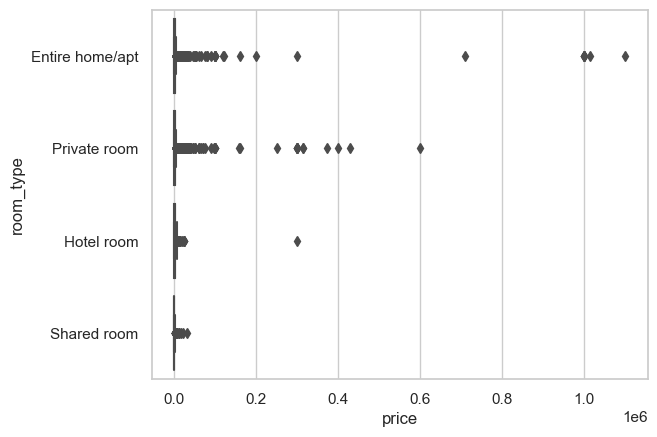

In [109]:
sns.boxplot(data = df,x='price', y='room_type')

In [110]:
df_apart=df[df['room_type']=='Entire home/apt'].sort_values('price',ascending=False)
df_prvt=df[df['room_type']=='Private room'].sort_values('price',ascending=False)

display(df_apart.head())
display(df_prvt.head())

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
12868,635676064543597376,New 1 bedroom apartment BTS MRT Asoke,12464705,Lucio,Vadhana,13.742186,100.560394,Entire home/apt,1100000,14,0,Not Reviewed,0.00,1,365,0
12300,562972065309061724,3B中文No Guest Service Fee@Nana Asok/Soi11 Nightlife,131427125,Jj,Vadhana,13.746660,100.559100,Entire home/apt,1014758,30,2,2022-09-17,0.32,10,75,2
4620,23740993,"Modern&Luxury apartment,5min to MRT,freeWifi",30803267,Yasmine,Huai Khwang,13.760650,100.568980,Entire home/apt,1000000,1,12,2020-03-24,0.22,4,336,0
1239,8880974,"Modern,wifi,5m MRT&2 Shopping Mall",30803267,Yasmine,Huai Khwang,13.759950,100.569360,Entire home/apt,1000000,100,45,2016-09-05,0.51,4,180,0
1779,11579635,"2 Bedroom,wifi,5mMRT&Shopping Mall",30803267,Yasmine,Huai Khwang,13.754710,100.565980,Entire home/apt,1000000,100,53,2018-02-20,0.64,4,249,0


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
4373,22633450,rm 1 : cozy & comfy,117057915,Jeab,Bang Phlat,13.79163,100.49038,Private room,600700,1,9,2020-01-26,0.17,5,330,0
11885,52940323,🎗𝘾𝙝𝙚𝙬𝙖𝙩𝙝𝙖𝙞 𝙍𝙖𝙢𝙠𝙝𝙖𝙢𝙝𝙖𝙚𝙣𝙜\nBy KhunGrape,99882630,Jiranuch,Bang Kapi,13.76082,100.63366,Private room,429443,1,0,Not Reviewed,0.00,1,313,0
12792,629653142142561774,rm 6 : bright morning sunlight.,117057915,Jeab,Bang Phlat,13.79049,100.48816,Private room,400717,1,0,Not Reviewed,0.00,5,241,0
6549,31365769,"WH (container, Double bed, 2ppl -F)",234881965,Napawadee,Khlong Toei,13.73514,100.55217,Private room,372227,1,24,2020-01-27,0.50,4,147,0
6760,31364368,"WH (Container style, twin bed, 2ppl, citycenter-A)",234881965,Napawadee,Khlong Toei,13.73505,100.55239,Private room,314899,1,4,2020-02-24,0.10,4,147,0


Terdapat outliers di room type entire home/apt dengan harga yang cukup tinggi dan juga ada yang memang sudah mempunyai review. Disini asumsi nya berhak saja host memberi harga pada unit mereka dengan harga tinggi dengan bukti listing mereka juga sudah pernah ada yang memesan. Jadi tidak perlu ada tindakan yang diambil karena ini adalah valid

MAKING NEW COLUMN

Disini kita akan membuat kolom baru bernama `'area'` dimana kolom ini berisi pengelompokkan wilayah pada kolom neighbourhood di kota bangkok yang berisi wilayah central, east, west, south dan juga wilayah yang jangkauannya jauh dari pusat kota bangkok yang tujuannya untuk mempermudah tahap analisis

In [111]:
area_mapping = {
    'Bang Sue': 'North Bangkok',
    'Lak Si': 'North Bangkok',
    'Sai Mai': 'North Bangkok',
    'Chatu Chak' : 'North Bangkok',
    'Don Mueang': 'North Bangkok',
    'Bang Khen': 'North Bangkok',
    'Chatuchak': 'North Bangkok',
    'Bang Kapi': 'East Bangkok',
    'Lat Krabang': 'East Bangkok',
    'Wang Thong Lang': 'East Bangkok',
    'Nong Chok': 'East Bangkok',
    'Bueng Kum': 'East Bangkok',
    'Min Buri': 'East Bangkok',
    'Saphan Sung' :'East Bangkok',
    'Khlong Sam Wa': 'East Bangkok',
    'Lat Phrao' : 'East Bangkok',
    'Khan Na Yao': 'East Bangkok',
    'Bangkok Yai': 'West Bangkok',
    'Khlong San' : 'West Bangkok',
    'Thon buri' : 'West Bangkok',
    'Thon Buri': 'West Bangkok',
    'Thung khru': 'West Bangkok',
    'Bang Phlat': 'West Bangkok',
    'Taling Chan': 'West Bangkok',
    'Phasi Charoen': 'West Bangkok',
    'Bang Khae': 'West Bangkok',
    'Bangkok Noi': 'West Bangkok',
    'Sathon': 'South Bangkok',
    'Phra Khanong' : 'South Bangkok',
    'Yan Nawa': 'South Bangkok',
    'Suanluang': 'South Bangkok',
    'Bang Na' : 'South Bangkok',
    'Bang Kho laen' : 'South Bangkok',
    'Bang Kho Laem': 'South Bangkok',
    'Rat Burana': 'South Bangkok',
    'Yan na wa': 'South Bangkok',
    'Ratchathewi': 'Central Bangkok',
    'Pra Wet' : 'Central Bangkok',
    'Parthum Wan': 'Central Bangkok',
    'Din Daeng': 'Central Bangkok',
    'Khlong Toei': 'Central Bangkok',
    'Phaya Thai': 'Central Bangkok',
    'Vadhana': 'Central Bangkok',
    'Huai Khwang': 'Central Bangkok',
    'Bang Rak': 'Central Bangkok',
    'Pathum Wan': 'Central Bangkok',
    'Phra Nakhon': 'Central Bangkok',
    'Dusit': 'Central Bangkok',
    'Pom Prap Sattru Phai': 'Central Bangkok',
    'Samphanthawong': 'Central Bangkok',
    'Bang Bon': 'Outer Western Bangkok',
    'Chom Thong': 'Outer Western Bangkok',
    'Thawi Watthana': 'Outer Western Bangkok',
    'Bang Khun thain': 'Outer Western Bangkok',
    'Nong Khaem': 'Outer Western Bangkok'
}

df['area'] = df['neighbourhood'].map(area_mapping)
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,area
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,Central Bangkok
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,Not Reviewed,0.00,2,358,0,South Bangkok
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,Not Reviewed,0.00,1,365,0,East Bangkok
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1,Central Bangkok
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,Not Reviewed,0.00,3,365,0,East Bangkok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,Not Reviewed,0.00,1,362,0,Central Bangkok
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,Not Reviewed,0.00,14,365,0,Central Bangkok
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,Not Reviewed,0.00,14,365,0,Central Bangkok
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,Not Reviewed,0.00,14,365,0,Central Bangkok


# **DATA ANALYSIS**

Setelah tahap data cleaning selesai kita bisa melakukan analisis untuk mengetahui jumlah listing pada setiap wilayah.

Analisis akan dilakukan dengan cara melihat total keseluruhan jenis listing pada setiap wilayah yang nantinya akan dilakukan analisis faktor apa yang mempengaruhi wilayah tersebut bisa mendapatkan listing tertinggi kita bisa menganalisa berdasarkan kolom `'neighbourhood'` dan juga kolom `'area'` yang bisa menjawab pertanyaan :

* Berapa jumlah keseluruhan total listing pada masing masing neighbourhood?
* Di wilayah mana terdapat jumlah listing terbanyak?
* Apa karakteristik khusus dari wilayah tersebut yang membuatnya diminati oleh pengguna?

In [112]:
df['neighbourhood'].unique()

array(['Ratchathewi', 'Bang Na', 'Bang Kapi', 'Din Daeng',
       'Bang Kho laen', 'Rat Burana', 'Chatu Chak', 'Khlong San',
       'Bang Rak', 'Phaya Thai', 'Sathon', 'Khlong Toei', 'Vadhana',
       'Sai Mai', 'Lat Krabang', 'Bangkok Yai', 'Wang Thong Lang',
       'Huai Khwang', 'Phasi Charoen', 'Bang Sue', 'Nong Chok',
       'Phra Khanong', 'Thawi Watthana', 'Parthum Wan', 'Pra Wet',
       'Phra Nakhon', 'Thon buri', 'Yan na wa', 'Suanluang', 'Don Mueang',
       'Dusit', 'Lak Si', 'Samphanthawong', 'Bueng Kum', 'Bang Phlat',
       'Saphan Sung', 'Min Buri', 'Khan Na Yao', 'Khlong Sam Wa',
       'Bang Khen', 'Lat Phrao', 'Chom Thong', 'Bangkok Noi',
       'Pom Prap Sattru Phai', 'Nong Khaem', 'Thung khru', 'Bang Khae',
       'Bang Khun thain', 'Taling Chan', 'Bang Bon'], dtype=object)

In [113]:
listing_count_by_neighbourhood = df['neighbourhood'].value_counts()
print(listing_count_by_neighbourhood)

Vadhana                 2150
Khlong Toei             2096
Huai Khwang             1122
Ratchathewi             1113
Bang Rak                827 
Sathon                  802 
Phra Nakhon             618 
Phra Khanong            557 
Chatu Chak              548 
Bang Na                 457 
Parthum Wan             455 
Din Daeng               443 
Phaya Thai              422 
Suanluang               382 
Khlong San              357 
Bang Kapi               260 
Bang Sue                250 
Bang Phlat              216 
Yan na wa               200 
Thon buri               182 
Don Mueang              166 
Pra Wet                 156 
Phasi Charoen           155 
Bangkok Noi             152 
Lat Krabang             149 
Bang Kho laen           140 
Lak Si                  126 
Pom Prap Sattru Phai    123 
Bang Khen               116 
Samphanthawong          114 
Wang Thong Lang         100 
Bang Khae               92  
Dusit                   91  
Bangkok Yai             90  
Chom Thong    

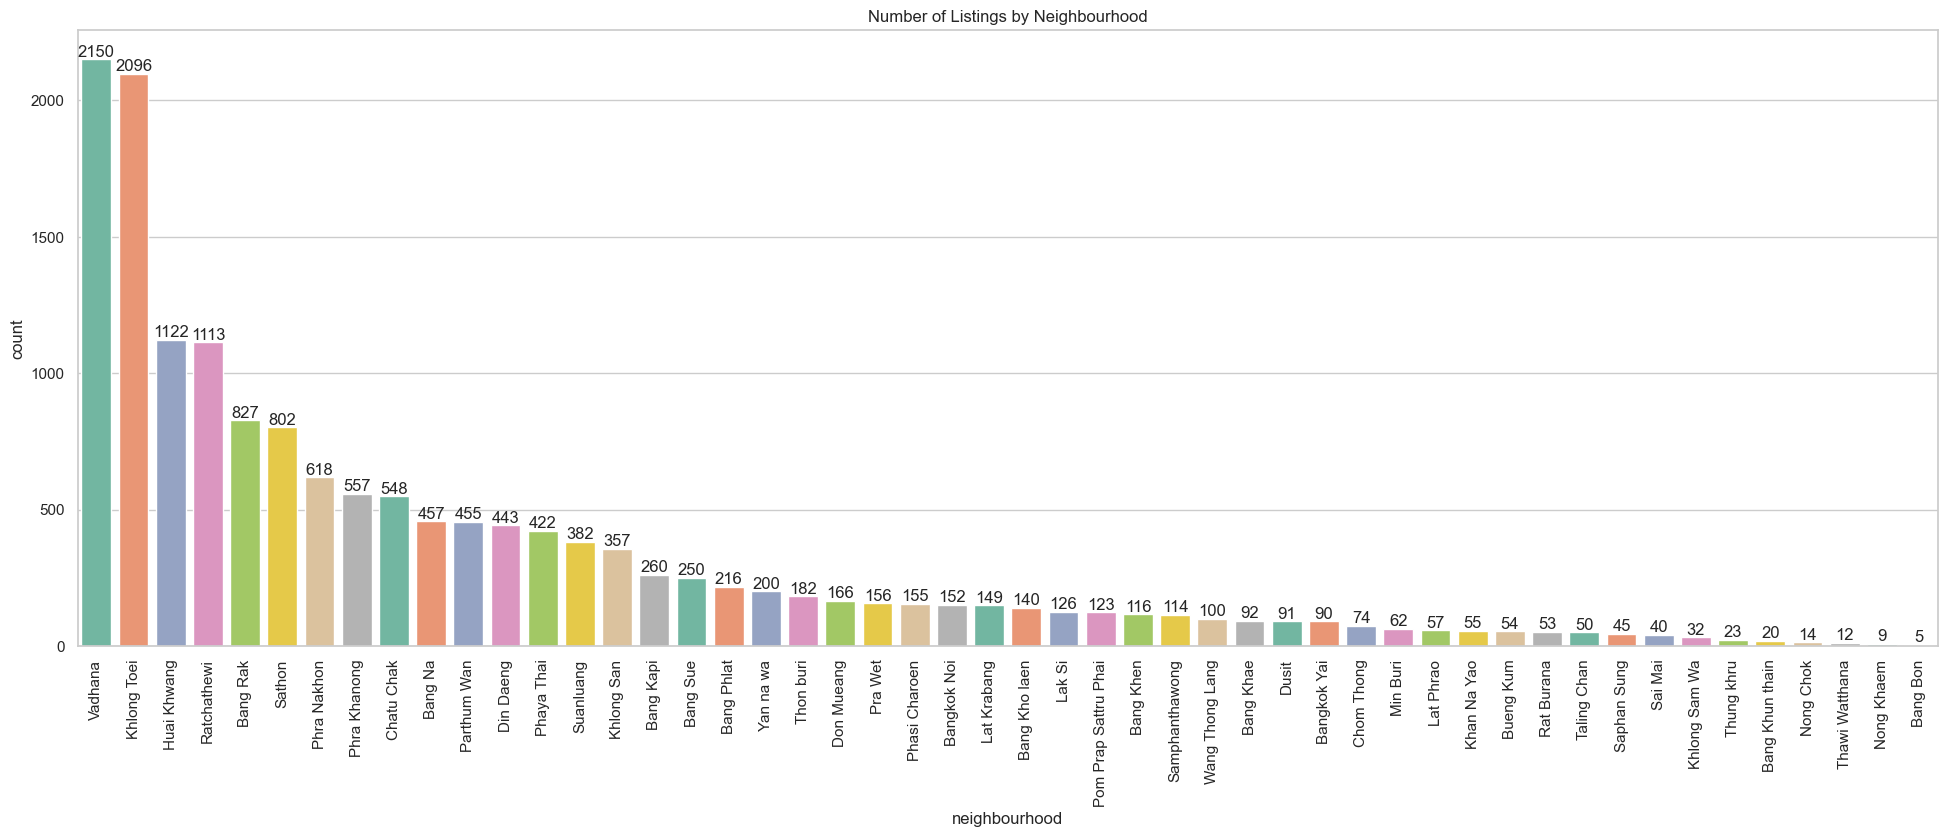

In [114]:
plt.figure(figsize = (24,8))
ax = sns.countplot(x='neighbourhood', data=df, order=df['neighbourhood'].value_counts().index, palette=sns.color_palette("Set2"))
abs_values = df['neighbourhood'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title('Number of Listings by Neighbourhood')
plt.xticks(rotation=90)
plt.show()

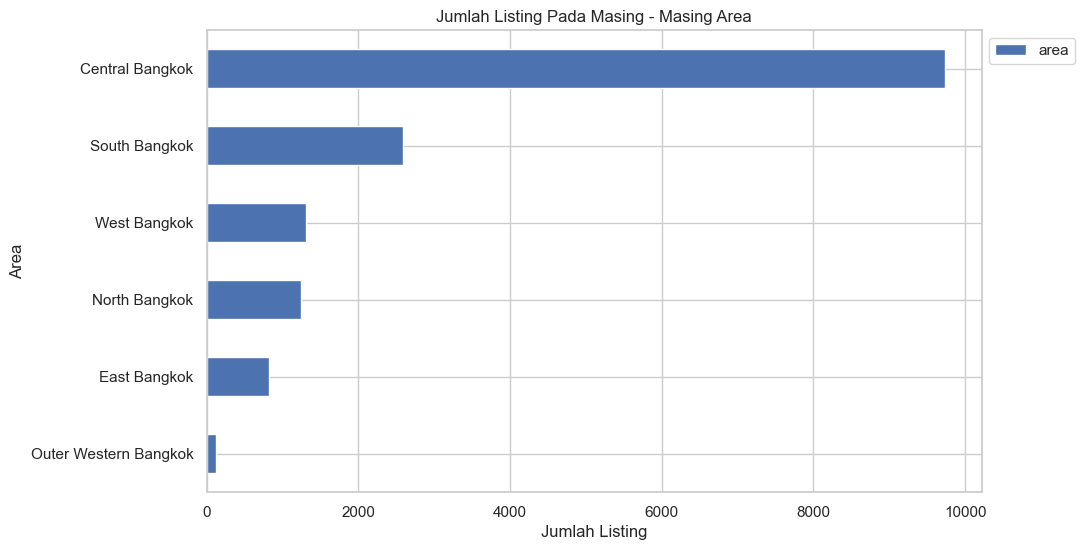

In [115]:
area_counts = df['area'].value_counts().sort_values(ascending=True)

# Menampilkan proporsi kolom 'area' dalam bentuk stacked bar chart
plt.figure(figsize=(10, 6))
area_counts.plot(kind='barh', stacked=True)
plt.xlabel('Jumlah Listing')
plt.ylabel('Area')
plt.title('Jumlah Listing Pada Masing - Masing Area')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Dari analisis diatas, dapat disimpulkan bahwa jumlah listing pada wilayah Central Bangkok lebih tinggi dibandingkan dengan wilayah South, West, dan wilayah lainnya. Neighbourhood yang memiliki jumlah listing tertinggi pun termasuk dari bagian Central Bangkok. dan dari hasil research berikut karakteristik masing - masing wilayah di Bangkok :
* Central Bangkok : Wilayah bagian tengah Bangkok terdapat pusat bisnis, pusat perbelanjaan, perkantoran dan juga wisata kota serta akses transportasi yang mudah. Layaknya di semua negara, dimana pusat kota menjadi yang terpadat dan memiliki tingkat aktivitas yang tinggi dibanding wilayah lain.
* East Bangkok : Wilayah bagian timur Bangkok adalah pusat industri dan juga pusat komersil. Di wilayah ini juga terdapat bandara internasional dan merupakan salah satu yang tersibuk di asia tenggara.
* West Bangkok : Wilayah bagian barat Bangkok mempunyai kehidupan lokal yang kuat dan warisan budaya. Terdapat taman nasional, pasar apung, dan juga kuil. Wilayah ini cocok untuk wisatawan yang ingin mengenal Bangkok secara budaya.
* South Bangkok : Wilayah bagian selatan Bangkok identik dengan distrik hiburan dan wisata nya. Dimana di wilayah ini mempunyai akses ke pulau selatan thailand yang terkenal yaitu pulau phuket. Wilayah ini sangat cocok untuk wisatawan yang ingin di kota ataupun ber rekreasi ke pantai dan pulau
* North Bangkok : Wilayah bagian utara bangkok adalah wilayah dengan kombinasi kehidupan perkotaan yang modern, tempat-tempat wisata yang menarik, dan warisan budaya. Wisatawan dapat menjelajahi pasar tradisional, berwisata religius, atau menikmati taman yang indah
* Outer Western Bangkok : Wilayah ini terdapat kuil yang sangat terkenal dan juga salah satu destinasi wisatawan. Namun karena letaknya yang jauh dari pusat kota biasanya diperlukan perjalanan yang cukup jauh untuk untuk dapat mengakses daerah paling barat dari Bangkok ini.


# **ANALISA TIPE KAMAR**
Setelah menganalisa jumlah listing di tiap wilayah, langkah selanjutnya adalah menganalisa persebaran jumlah kamar di masing-masing wilayah. Dengan menganalisa persebaran jumlah kamar. kita dapat mengetahui distribusi jenis kamar seperti Entire home/apt, Private room, Hotel room dan Shared room kamar bersama di masing-masing wilayah. Dengan demikian kita bisa menjawab pertanyaan berikut:

* Bagaimana distribusi jenis kamar atau presentase jenis kamar Entire home/apt, Private room, Hotel room dan Shared room di total keseluruhan data?
* Bagaimana proporsi masing-masing jenis kamar, seperti Entire home/apt, Private room, Hotel room dan Shared room di masing masing area?

In [116]:
df['room_type'].value_counts()

Entire home/apt    8900
Private room       5762
Hotel room         649 
Shared room        521 
Name: room_type, dtype: int64

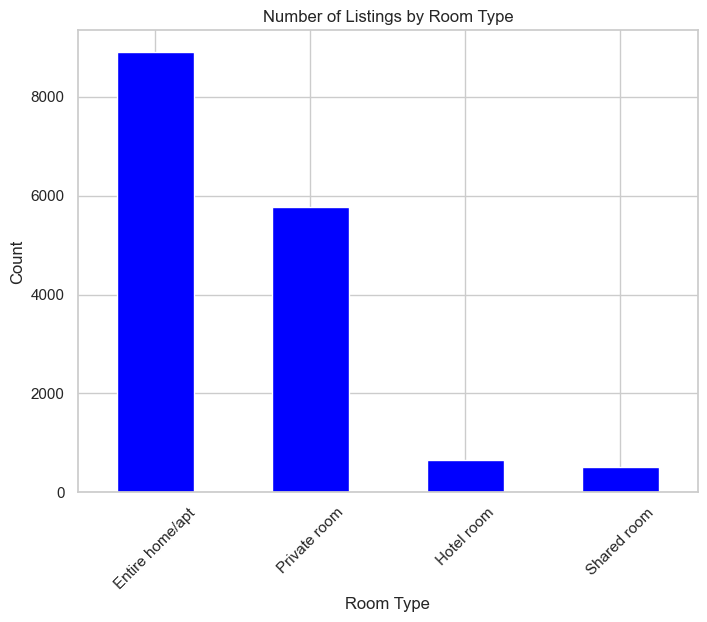

In [117]:
room_type_counts = df['room_type'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 6))
room_type_counts.plot(kind='bar', color='blue')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Number of Listings by Room Type')
plt.xticks(rotation=45)
plt.show()

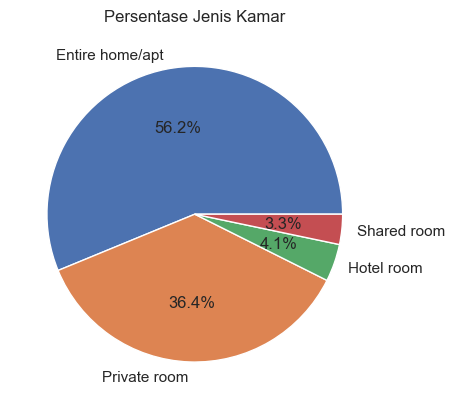

In [118]:
room_type_counts = df['room_type'].value_counts()
room_type_percentages = room_type_counts / len(df) * 100

plt.pie(room_type_percentages, labels=room_type_percentages.index, autopct='%1.1f%%')
plt.title('Persentase Jenis Kamar')
plt.show()

Dapat terlihat bahwa distribusi tipe kamar di keseluruhan data paling banyak adalah Entire home/apt dimana mencapai sekitar 56% dan yang kedua adalah Private room di angka 36%. Ini menunjukan host mempunyai paling banyak listing tipe Rumah dan Apartemen disusul dengan Private room yang disediakan untuk pelanggan

Dari keempat jenis kamar berikut adalah deskripsi per masing - masing kamar :

Entire home/apt (Seluruh Rumah/Apartemen):

Umumnya disewa untuk jangka waktu yang lebih lama, seperti beberapa hari hingga beberapa minggu.
Cocok untuk tamu yang mencari privasi dan kenyamanan seperti tinggal di rumah sendiri.
Menyediakan fasilitas lengkap, seperti dapur, ruang tamu, kamar tidur, dan kamar mandi pribadi.

Private room (Kamar Pribadi):

Biasanya disewa untuk jangka waktu yang bervariasi, mulai dari beberapa hari hingga beberapa minggu.
Cocok untuk tamu yang menginginkan privasi tetapi tidak memerlukan ruang yang banyak.
Biasanya memiliki fasilitas seperti kamar tidur pribadi dan kamar mandi, tetapi fasilitas umum seperti dapur dan ruang tamu mungkin dibagi dengan pemilik atau tamu lain.

Hotel room (Kamar Hotel):

Biasanya disewa untuk jangka waktu singkat, seperti satu atau beberapa malam.
Cocok untuk tamu yang mencari kenyamanan dan fasilitas layanan hotel.
Menyediakan fasilitas seperti tempat tidur, kamar mandi pribadi, dan beberapa fasilitas tambahan seperti restoran, kolam renang, atau gym yang terletak di hotel.

Shared room (Kamar Bersama):

Biasanya disewa untuk jangka waktu yang singkat, seperti beberapa malam atau penginapan sementara.
Cocok untuk tamu yang mencari akomodasi dengan biaya rendah dan siap berbagi ruangan dengan tamu lain.
Biasanya memiliki fasilitas umum yang dibagi dengan tamu lain, seperti tempat tidur bersama, kamar mandi bersama, dan ruang umum yang mungkin termasuk dapur atau ruang tamu.

In [119]:
cross_tab = pd.crosstab(df['area'], df['room_type'])
print(cross_tab)

room_type              Entire home/apt  Hotel room  Private room  Shared room
area                                                                         
Central Bangkok        5646             528         3155          401        
East Bangkok           352              15          435           26         
North Bangkok          585              20          624           17         
Outer Western Bangkok  60               0           58            2          
South Bangkok          1607             47          892           45         
West Bangkok           650              39          598           30         


In [120]:
chi2, p_value, _, _ = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)

if p_value <= 0.05:
    print("Terdapat hubungan yang signifikan antara 'area' dan 'room_type'.")
else:
    print("Tidak terdapat hubungan yang signifikan antara 'area' dan 'room_type'.")

Chi-square statistic: 454.0831916933966
P-value: 2.832680974883923e-87
Terdapat hubungan yang signifikan antara 'area' dan 'room_type'.


<Figure size 1000x600 with 0 Axes>

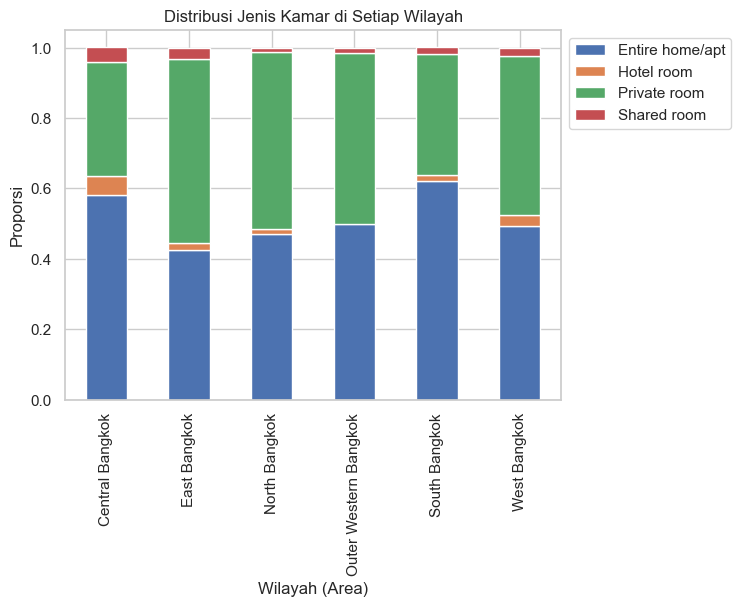

In [121]:
cross_tab = pd.crosstab(df['area'], df['room_type'])

cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = cross_tab_prop.plot(kind='bar', stacked=True)
plt.xlabel('Wilayah (Area)')
plt.ylabel('Proporsi')
plt.title('Distribusi Jenis Kamar di Setiap Wilayah')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

Dilihat dari persebarannya bahwa kamar tipe Entire home/apt dan private room memiliki distribusi paling banyak di semua wilayah sedangkan kamar tipe Hotel room dan Shared room memiliki jumlah yang cenderung sedikit di semua wilayah

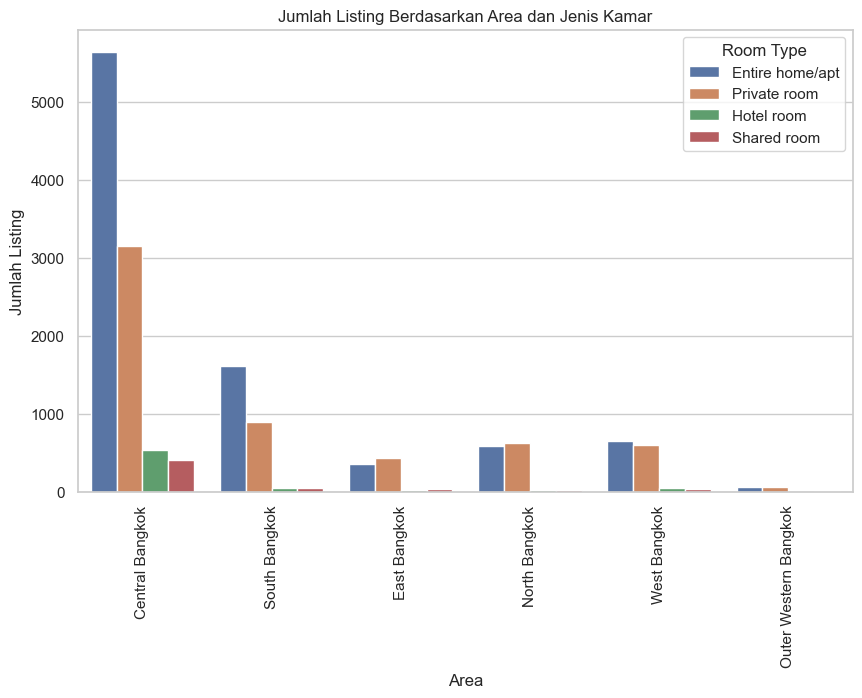

In [122]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='area', hue='room_type')
plt.xlabel('Area')
plt.ylabel('Jumlah Listing')
plt.title('Jumlah Listing Berdasarkan Area dan Jenis Kamar')
plt.legend(title='Room Type')
plt.xticks(rotation=90)
plt.show()

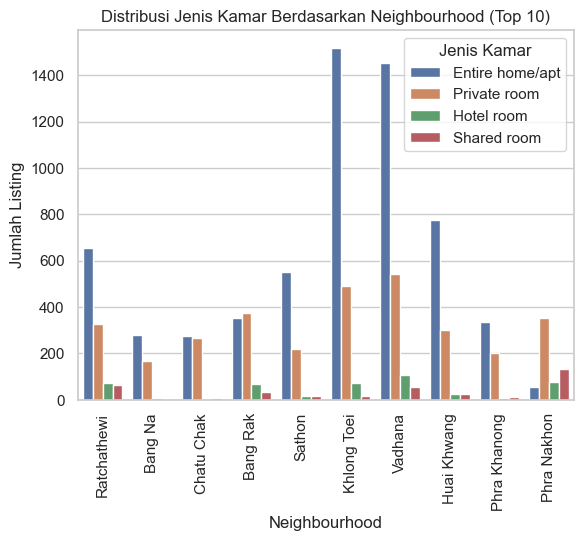

In [123]:
top_neighbourhoods = df['neighbourhood'].value_counts().nlargest(10).index
df_top_neighbourhoods = df[df['neighbourhood'].isin(top_neighbourhoods)]

sns.countplot(data=df_top_neighbourhoods, x='neighbourhood', hue='room_type')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Jumlah Listing')
plt.title('Distribusi Jenis Kamar Berdasarkan Neighbourhood (Top 10)')
plt.legend(title='Jenis Kamar')
plt.show()

Terdapat jumlah yang sangat signifikan dalam kamar jenis Entire home/apt khususnya di daerah Central Bangkok dan Neighbourhood yang memiliki jumlah listing terbanyak juga masuk ke dalam wilayah Central Bangkok. Penyewa lebih tertarik untuk menyewa dan menetap di daerah Central Bangkok. Dimana penyewa menginginkan akses yang dekat dengan kota, kelengkapan fasilitas dan sarana serta kemudahan transportasi.

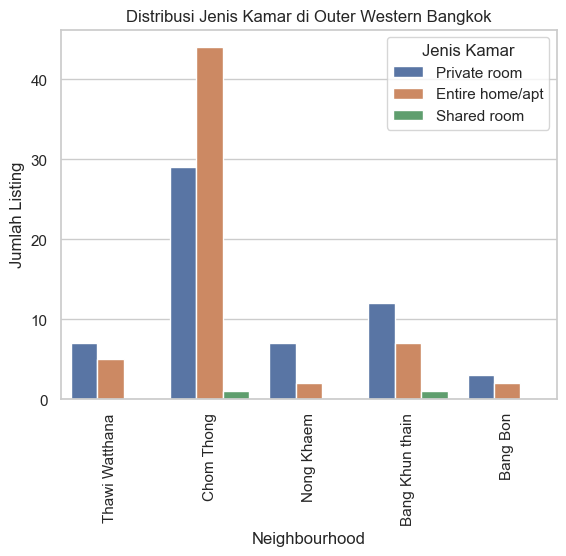

In [124]:
top_neighbourhoods = df[df['area'] == 'Outer Western Bangkok']['neighbourhood'].value_counts().nlargest(10).index
df_top_neighbourhoods = df[df['neighbourhood'].isin(top_neighbourhoods) & (df['area'] == 'Outer Western Bangkok')]

sns.countplot(data=df_top_neighbourhoods, x='neighbourhood', hue='room_type')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Jumlah Listing')
plt.title('Distribusi Jenis Kamar di Outer Western Bangkok')
plt.legend(title='Jenis Kamar')
plt.show()

Terdapat sekitar 40 kamar bertipe Entire home/apt di wilayah Outer Western Bangkok. dimana wilayah ini jauh dari pusat kota dan wilayah ini mempunyai karakteristik sebagai salah satu tempat wisata tetapi neighbourhood lain di wilayah sama justru banyak di Private room. Persebaran ini sudah benar kecuali di satu Neighbourhood yaitu Chom Thong karena mengingat wilayah ini cenderung sebagai tempat wisata yang jauh dari pusat kota dimana Private room dan Shared room seharusnya lebih ditingkatkan mengingat wisatawan yang ke wilayah ini hanya untuk berwisata dalam waktu yang cenderung singkat. Tetapi beberapa penyewa juga ada yang berminat untuk menyewa jenis Entire home/apt dalam waktu yang moderate

# **ANALISA HARGA TIPE KAMAR**

In [125]:
df.groupby('room_type')['price'].mean()

room_type
Entire home/apt    3467.083708
Hotel room         3028.309707
Private room       3066.420687
Shared room        896.028791 
Name: price, dtype: float64

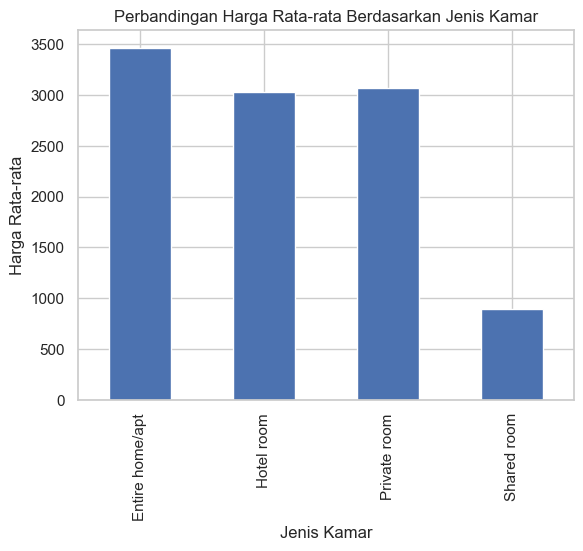

In [126]:
room_type_avg_price = df.groupby('room_type')['price'].mean()
room_type_avg_price.plot(kind='bar')
plt.xlabel('Jenis Kamar')
plt.ylabel('Harga Rata-rata')
plt.title('Perbandingan Harga Rata-rata Berdasarkan Jenis Kamar')
plt.show()

Penyewa cenderung enggan untuk menyewa di Shared room dan lebih memilih Private room atau hotel untuk waktu yang singkat. Hal ini dapat dilihat dari grafik dimana ketersediaan Private room jauh lebih banyak dan Hotel room sedikit diatas Shared room. Hal ini karena Shared room cenderung berbagi kamar dengan penyewa lain sehingga penyewa pun tidak punya privasi di dalam kamar dan memiliki fasilitas yang minim. Jadi meskipun harga Shared room cenderung ekonomis penyewa lebih memilih kamar dengan opsi lain dengan harga rata rata yang tinggi dibanding dengan Shared room.

In [127]:
df.groupby('area')['price'].mean()

area
Central Bangkok          3733.491984
East Bangkok             2326.628019
North Bangkok            1915.768860
Outer Western Bangkok    2026.858333
South Bangkok            2101.340409
West Bangkok             3515.410782
Name: price, dtype: float64

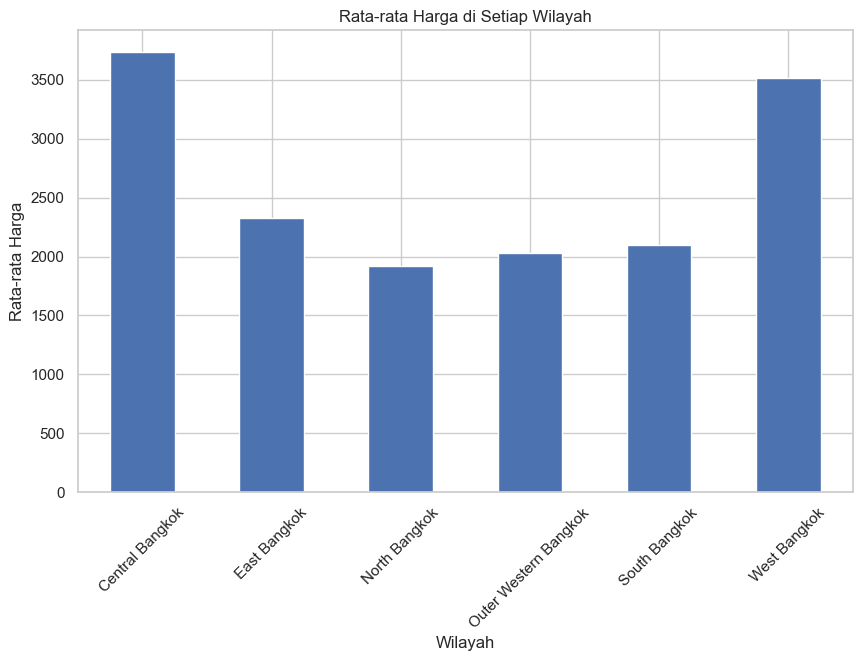

In [128]:
average_price_by_area = df.groupby('area')['price'].mean()
plt.figure(figsize=(10, 6))
average_price_by_area.plot(kind='bar')
plt.xlabel('Wilayah')
plt.ylabel('Rata-rata Harga')
plt.title('Rata-rata Harga di Setiap Wilayah')
plt.xticks(rotation=45)
plt.show()

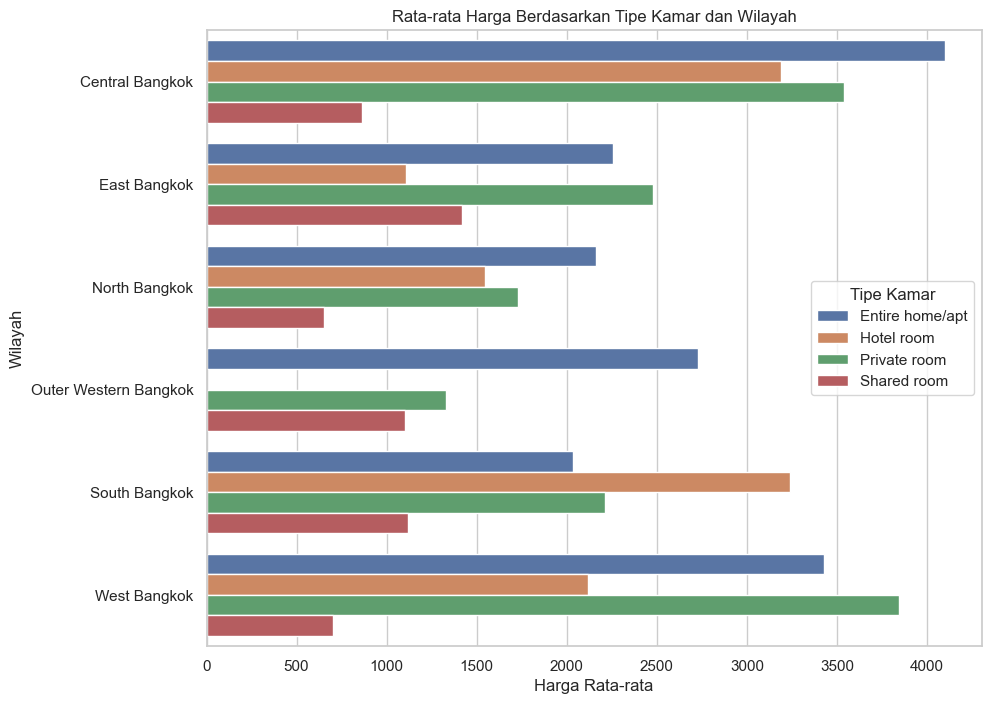

In [129]:
avg_price_by_room_area = df.groupby(['room_type', 'area'])['price'].mean().reset_index()
plt.figure(figsize=(10, 8))
sns.barplot(data=avg_price_by_room_area, y='area', x='price', hue='room_type', orient='h')
plt.ylabel('Wilayah')
plt.xlabel('Harga Rata-rata')
plt.title('Rata-rata Harga Berdasarkan Tipe Kamar dan Wilayah')
plt.legend(title='Tipe Kamar')
plt.show()

Dari grafik diatas dapat disimpulkan bahwa setiap wilayah mempunyai harga rata - rata yang berbeda di keempat jenis kamar. Harga dari masing - masing listing juga bervariasi dari mulai yang paling rendah dan yang paling tinggi di setiap wilayah Bangkok. Ini memberikan penyewa preferensi untuk menginap dan tinggal sesuai budget penyewa

# **KESIMPULAN**

Dari analisis yang telah dilakukan kita dapat mengambil kesimpulan sebagai berikut :

* Wilayah Central Bangkok memiliki jumlah listing yang tinggi dibandingkan dengan wilayah lain. Hal ini dapat disebabkan oleh keberadaan pusat bisnis, pusat perbelanjaan, perkantoran, dan akses transportasi yang mudah di wilayah tersebut. Sehingga banyak wisatawan yang berminat untuk menyewa di wilayah Central Bangkok
* Wilayah South Bangkok memiliki jumlah listing yang signifikan karena wilayah tersebut sebagai distrik hiburan dan wisatawan cenderung banyak ke wilayah ini
* Wilayah East, West, North dan Outer Western Bangkok mempunyai distribusi jenis listing yang berbeda beda dari yang terjangkau sampai yang paling mahal sekalipun
* Berdasarkan jenis kamar, dapat disimpulkan bahwa "Entire home/apt" (Seluruh Rumah/Apartemen) menjadi pilihan yang populer bagi tamu yang mencari privasi dan kenyamanan seperti tinggal di rumah sendiri. dan Private room (Kamar Pribadi) juga menjadi pilihan yang banyak diminati, terutama bagi tamu yang menginginkan privasi tetapi tidak memerlukan ruang yang banyak.
* Harga rata-rata di setiap wilayah Bangkok bervariasi tergantung pada jenis kamar dan lokasinya. Wisatawan dapat memilih wilayah yang sesuai dengan preferensi mereka dan menyesuaikan anggaran akomodasi mereka dengan mempertimbangkan harga rata-rata di setiap wilayah dan jenis kamar yang mereka inginkan

# **REKOMENDASI**

Dari analisis diatas kita dapat membuat rekomendasi persebaran jenis listing dari masing - masing wilayah :

* Wilayah Cental Bangkok : <br>
    1. Karena wilayah ini sebagai pusat kota dimana wilayah ini padat dan mempunyai banyak aktivitas maka kita bisa tingkatkan ketersediaan kamar bertipe Entire home/apt, Private room, dan Hotel room dalam range harga yang bervariasi
    2. Tingkatkan ketersediaan kamar dekat dengan sarana transportasi seperti Halte, Stasiun dll. Hal ini dapat mempermudah penyewa dalam segi transportasi sehingga banyak penyewa yang tertarik dengan kemudahan tersebut<br>
<br>

* Wilayah East Bangkok : 
    1. Wilayah ini dekat dengan Bandara dan pusat industri di bangkok. Artinya banyak orang yang bekerja di pusat industri juga. Maka yang harus ditingkatkan adalah ketersediaan kamar jenis Entire Home/apt yang dekat dengan pusat industri. Sehingga baik orang lokal maupun internasional yang bekerja di pusat industri dapat menyewa jenis kamar tersebut sebagai rumah untuk waktu yang lama
    2. Tingkatkan kamar berjenis Hotel room di sekitar bandara. Dimana wisatawan dapat beristirahat baik setelah melakukan penerbangan maupun wisatawan yang mendapat jadwal penerbangan pagi sehingga kamar tipe ini cocok untuk di tingkatkan di sekitar bandara.<br>
<br>

* Wilayah West Bangkok :
    1. Wilayah ini mempunyai karakteristik budaya yang kuat dengan kuil kuil megah dan mempunyai taman nasional. Sehingga wilayah ini cocok untuk dibangun kamar ber tipe Hotel room yang mempunyai konsep ethnic. Hal ini dapat meningkatkan atensi wisatawan dimana wisatawan mendapat experience menginap dengan nuansa budaya ethnic Bangkok
    2. Selain itu di wilayah ini juga dapat di tingkatkan kamar berjenis Entire home/apt dan Shared room. Dimana penyewa dapat memilih listing untuk tinggal dalam waktu lama maupun dalam waktu singkat untuk dapat mengenal budaya Bangkok.<br>
<br>

* Wilayah South Bangkok :
    1. Wilayah ini mempunyai distrik hiburan yang banyak sehingga dapat di tingkatkan kamar dengan tipe Hotel room dan Private room di kota atapun di daerah pantai. Dimana penyewa dapat menikmati hiburan dalam waktu singkat dan berkesan.
    2. Karena wilayah ini juga sebagai wilayah penghubung antara Bangkok dan Pulau Phuket. Artinya banyak wisatawan yang melewati kota ini untuk menyebrang ke pulau Phuket. Sebaiknya di tingkatkan juga tipe room berjenis Shared room yang ekonomis untuk wisatawan agar dapat beristirahat sementara untuk nantinya melanjutkan perjalanan ke Pulau Phuket <br>
<br>

* Wilayah North Bangkok :
    1. Wilayah ini memiliki variasi antara suasana kota modern, tempat wisata dan taman sehingga wilayah cocok untuk di tingkatkan room type berjenis Entire home/apt. Penyewa cenderung tertarik dan akan merasa nyaman dengan suasana wilayah seperti ini untuk di jadikan rumah dalam waktu lama<br>
<br>

* Wilayah Outer Western Bangkok :
    1. Letak dari wilayah ini jauh dari pusat kota. Kebanyakan wisatawan ke wilayah ini untuk melihat kuil terkenal di bangkok. Jadi wilayah ini cocok untuk di tingkatkan hotel room dengan konsep budaya. Mengingat di tempat ini tidak ada kamar ber jenis Hotel room juga. Ini dapat dijadikan pertimbangan
    2. Karena wisatawan ke tempat ini cenderung dalam waktu singkat hanya untuk melihat tempat wisata. Jadi disarankan untuk meningkatkan kamar berjenis Private room dan Shared room. Agar wisatawan dapat berisitirahat dalam waktu singkat dengan harga yang ekonomis untuk nantinya kembali ke pusat kota.<br>

Harga dari setiap unit yang akan dibangun dapat di sesuaikan harga nya dengan memperhatikan lokasi, karakteristik wilayah dan fasilitas unit. Jika unit yang akan dibangun jauh aksesnya maka pertimbangkan untuk memberi harga menengah ke bawah. Jika unit yang akan dibangun mempunyai fasilitas seperti kemudahan transportasi, letaknya di kota, dan mempunyai fasilitas penting lainnya yang memudahkan penyewa. Maka bisa di pertimbangkan untuk memberi harga menengah keatas

Selain rekomendasi wilayah dan harga. Pihak Airbnb dapat membuat promo atau campaign terkait pendaftaran listing. Ini bertujuan agar lebih banyak lagi pemilik properti yang menjadi host Airbnb dan mendaftarkan properti mereka ke dalam listing Airbnb. 

Dengan rekomendasi yang telah dijelaskan diatas. Diharapkan pihak Sales & Marketing AirBnb mendapat insight untuk nantinya dapat memetakan jenis kamar yang ingin dibangun dengan acuan karakteristik dari masing - masing wilayah beserta harga nya. Dan diharapkan atas insight yang telah diberikan dapat meningkatkan sales dari AirBnb untuk tahun berikutnya.

